# numpy チートシート

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# np.expand_dims(img_tensor,axis=0)
img_tensorに0列目に次元を増やす。axisで場所を指定

# np.zeros((15,16))
 15×16の要素がすべて0のnumpy配列を作成

# np.where(X>=0,1,-1)
 行列X中の様子で0以上(条件)のものは1,0以下のものは-1にする
 ステップ関数で利用

In [8]:
a = np.arange(9).reshape((3, 3))
print(a)
# 行列aの要素で4以上のものは１,4以下は-1にする
np.where(a>=4,1,-1)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[-1, -1, -1],
       [-1,  1,  1],
       [ 1,  1,  1]])

# np.arange(1,10,2)
Python のrange(1,10,2)に対応し、等差数列のnumpy行列を作成

In [10]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

## np.meshgrid(x,y)
格子座標を作成する便利な関数

## 行と要素を指定　X[:,[2,3]]
行列Xをすべての行表示し、２列目と３列目をとりだす

In [5]:
from sklearn import datasets
iris=datasets.load_iris()
print(iris.data[:5])
print(iris.data[:5,[2,3]])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


## np.unique(X)
重複を削除した配列をつくる

In [10]:
x=[1,2,2,2,3,3,4]
y=['aa','aa','bb','bb','cc']
print(np.unique(x))
print(np.unique(y))

[1 2 3 4]
['aa' 'bb' 'cc']


## np.hstack((x1,x2))
配列を水平方向につなげる。

In [20]:
x1=np.arange(10)
x2=np.arange(3)

print(x1)
print(x2)
print(np.hstack((x1,x2)))

y1=np.arange(12).reshape(2,2,3)
y2=np.arange(6).reshape(2,1,3)

print(y1)
print(y2)
print(np.hstack((y1,y2)))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2]
[0 1 2 3 4 5 6 7 8 9 0 1 2]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
[[[0 1 2]]

 [[3 4 5]]]
[[[ 0  1  2]
  [ 3  4  5]
  [ 0  1  2]]

 [[ 6  7  8]
  [ 9 10 11]
  [ 3  4  5]]]


## np.vstack((x1,x2))
縦方向に連結する 列数があってないとエラー吐く

In [23]:
np.vstack(([1,2],[2,3]))

array([[1, 2],
       [2, 3]])

## np.random.randn(200,2)
標準正規分布に従う乱数を要素に持つ200行2列の行列を作成

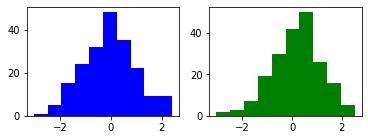

In [37]:
X=np.random.randn(200,2)
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(6,2))
ax[0].hist(X[:,0],color='blue')
ax[1].hist(X[:,1],color='green')
plt.show()

## np.logical_xor(X[:,0]>0,X[:,1]>0)
排他的論理和(入力の2つの信号のうち、一方が1のときにだけ1を出力する)で、bool値を返す

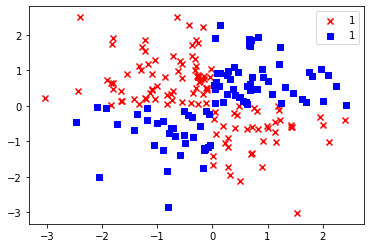

In [58]:
y_xor=np.logical_xor(X[:,0]>0,X[:,1]>0)
y_xor=np.where(y_xor,1,-1)
plt.scatter(X[y_xor==1,0],X[y_xor==1,1],c='r',marker='x',label='1')
plt.scatter(X[y_xor==-1,0],X[y_xor==-1,1],c='b',marker='s',label='1')
plt.legend()
plt.show()